<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/Instructor_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Notes from lecture:
#math mul (matrices multiplication)
#python classes
#python exception
#python __?
#python pyodide?
#binary linear/logistic regression, etc

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
#webcam feature that we were experimenting with
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


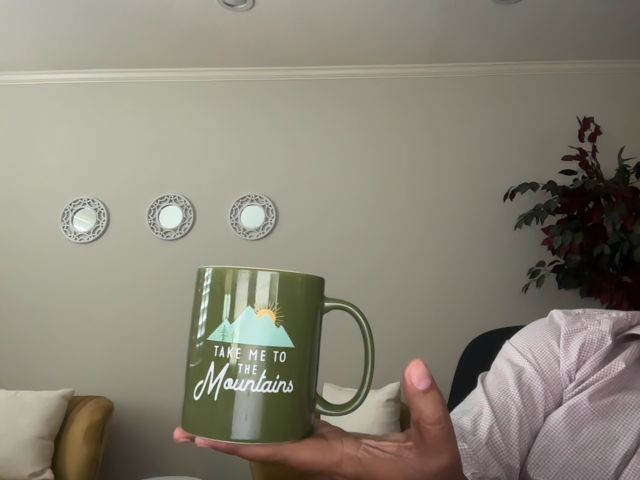

In [ ]:
#2nd part of webcam feature; ignore
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

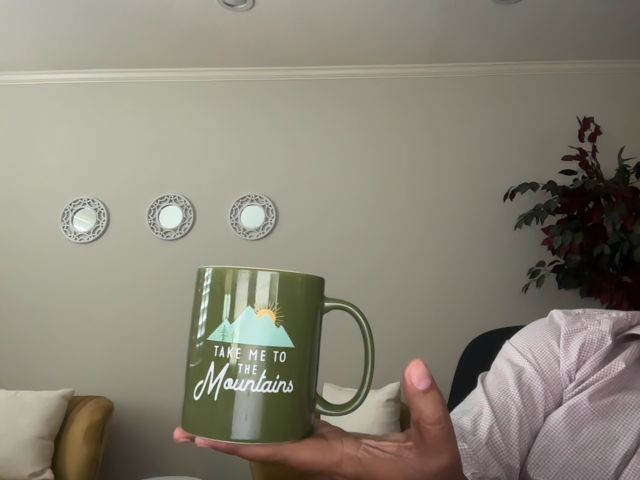

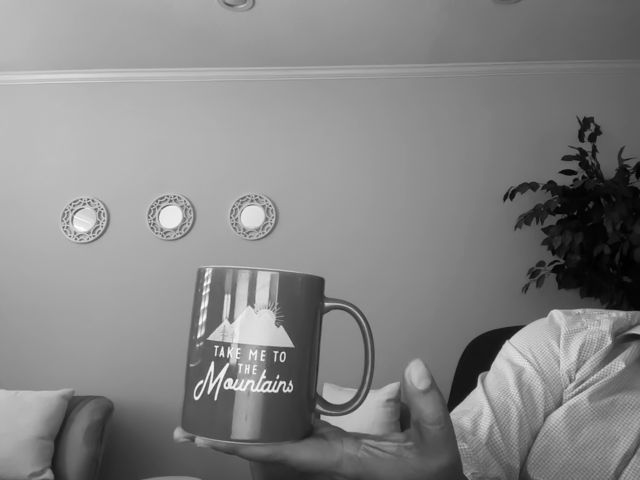

In [ ]:
#normalize image cell
import cv2
from google.colab.patches import cv2_imshow
# Read color image
image = cv2.imread('photo.jpg')

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize grayscale image
normalized_gray_image = cv2.normalize(
    gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Convert normalized grayscale image back to color
normalized_color_image = cv2.cvtColor(
    normalized_gray_image, cv2.COLOR_GRAY2BGR)

# Display original and normalized images
cv2_imshow(image)
cv2_imshow(normalized_color_image)

In [ ]:
model = YOLO("yolov5nu.pt")

100%|██████████| 5.27M/5.27M [00:00<00:00, 104MB/s]


In [ ]:
result = model.predict("photo.jpg")


image 1/1 /content/photo.jpg: 480x640 1 person, 2 cups, 1 chair, 1 couch, 1 potted plant, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
print(result.names) #current things that machine knows

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
result = result[0]
len(result.boxes)

6

In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  if class_id in ["bottle", "cup", "glass"]:
    print("recycable material")
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

recycable material
Object type: cup
Coordinates: [181, 266, 396, 448]
Probability: 0.38
---
recycable material
Object type: cup
Coordinates: [182, 266, 323, 446]
Probability: 0.36
---


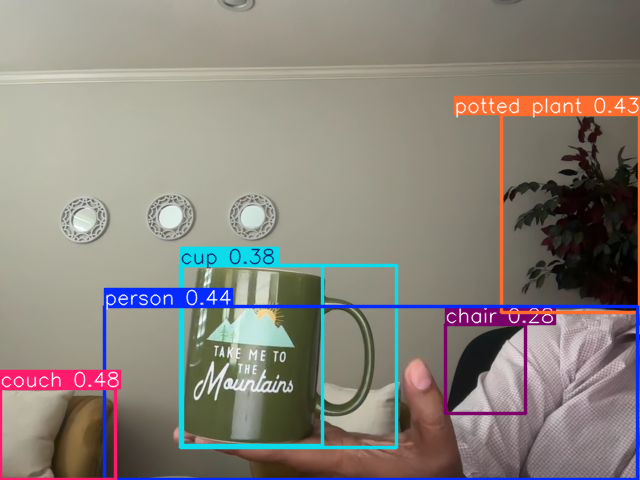

In [ ]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

In [ ]:
scaled =